# BAG-OF-WORDS (NLP) - COMPARING DIFFERENT CLASSIFICATION MODEL

## IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## IMPORTING THE DATASET

In [2]:
dataset=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


## CLEANING THE TEXTS 
* REMOVING THE PUNCTUATIONS (LIKE , . ' ' etc)
* CONVERTING THE TEXT TO LOWER CASE
* REMOVING THE STOPWORDS
* STEMMING THE DATA

In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range (0,1000):
    new_word=re.sub('[^a-zA-z]',' ',dataset.Review[i])
    new_word=new_word.lower()
    new_word=new_word.split()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    ps=PorterStemmer()
    new_word=[ps.stem(word) for word in new_word if not word in set(all_stopwords)]
    new_word=" ".join(new_word)
    corpus.append(new_word)
corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

# CREATING THE BAG-OF-WORDS MODEL
Here we are coverting the text into the vector having count of each word in the text 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,-1].values

In [5]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
print(y)

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 

## SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [8]:
print('X_TRAIN')
print(x_train)
print('\n')
print('X_TEST')
print(x_test)
print('\n')
print('Y_TRAIN')
print(y_train)
print('\n')
print('Y_TEST')
print(y_test)

X_TRAIN
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


X_TEST
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Y_TRAIN
[1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1

# 1) TRAINING OUR FIRST CLASSIFICATION MODEL --> LOGISTIC REGRESSION

In [9]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train,y_train)

LogisticRegression(random_state=0)

## PREDICTING THE RESULTS ON TEST SET

In [10]:
y_pred=classifier1.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

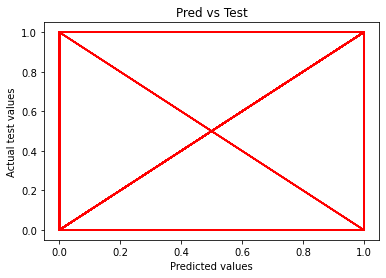

In [21]:
plt.plot(y_pred,y_test,color='red')
plt.title('Pred vs Test')
plt.xlabel('Predicted values')
plt.ylabel('Actual test values')
plt.show()

## MAKING CONFUSION MATRIX

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1=confusion_matrix(y_test,y_pred)
print(cm1)
accuracy_score1=accuracy_score(y_test,y_pred)
print(accuracy_score1)

[[80 17]
 [28 75]]
0.775


# 2) TRAINING OUR SECOND CLASSIFICATION MODEL --> SUPPORT VECTOR MACHINE(SVM)

In [24]:
from sklearn.svm import SVC
classifier2=SVC(kernel='linear',random_state=0)
classifier2.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

## PREDICTING THE RESULTS ON TEST SET

In [28]:
y_pred=classifier2.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]

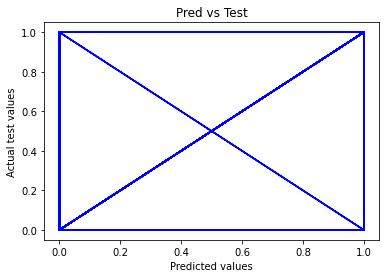

In [29]:
plt.plot(y_pred,y_test,color='blue')
plt.title('Pred vs Test')
plt.xlabel('Predicted values')
plt.ylabel('Actual test values')
plt.show()

## MAKING CONFUSION MATRIX

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2=confusion_matrix(y_test,y_pred)
print(cm2)
accuracy_score2=accuracy_score(y_test,y_pred)
print(accuracy_score2)

[[79 18]
 [24 79]]
0.79


### <code><center>Accuracy: SVM(79%)>Logistic_Regression(77.5%)</center></code>

# 3) TRAINING OUR THIRD CLASSIFICATION MODEL --> K-NEAREST NEIGHBORS(K-NN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier3=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

## PREDICTING THE RESULTS ON TEST SET

In [32]:
y_pred=classifier3.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]

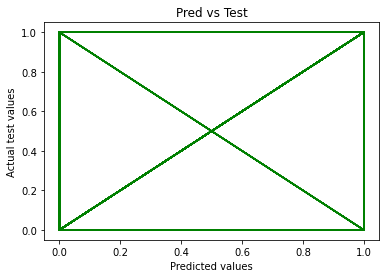

In [33]:
plt.plot(y_pred,y_test,color='green')
plt.title('Pred vs Test')
plt.xlabel('Predicted values')
plt.ylabel('Actual test values')
plt.show()

## MAKING CONFUSION MATRIX

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm3=confusion_matrix(y_test,y_pred)
print(cm3)
accuracy_score3=accuracy_score(y_test,y_pred)
print(accuracy_score3)

[[85 12]
 [56 47]]
0.66


### <code><center>Accuracy: SVM(79%)>Logistic_Regression(77.5%)>K-NN(66%)</center></code>

# 4) TRAINING OUR FOURTH CLASSIFICATION MODEL --> NAIVE BAYES

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier4=GaussianNB()
classifier4.fit(x_train,y_train)

GaussianNB()

## PREDICTING THE RESULTS ON TEST SET

In [36]:
y_pred=classifier4.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

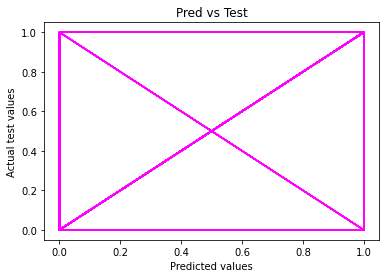

In [38]:
plt.plot(y_pred,y_test,color='magenta')
plt.title('Pred vs Test')
plt.xlabel('Predicted values')
plt.ylabel('Actual test values')
plt.show()

## MAKING CONFUSION MATRIX

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm4=confusion_matrix(y_test,y_pred)
print(cm4)
accuracy_score4=accuracy_score(y_test,y_pred)
print(accuracy_score4)

[[55 42]
 [12 91]]
0.73


### <code><center>Accuracy: SVM(79%)>Logistic_Regression(77.5%)>Naive Bayes(73%)>K-NN(66%)</center></code>

# 5) TRAINING OUR FIFTH CLASSIFICATION MODEL --> KERNEL-SVM

In [40]:
from sklearn.svm import SVC
classifier5=SVC(kernel='rbf',random_state=0)
classifier5.fit(x_train,y_train)

SVC(random_state=0)

## PREDICTING THE RESULTS ON TEST SET

In [42]:
y_pred=classifier5.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

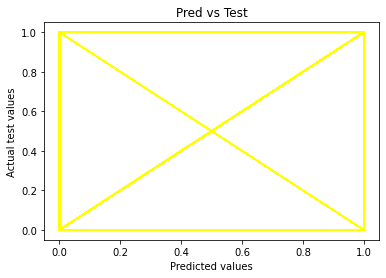

In [43]:
plt.plot(y_pred,y_test,color='yellow')
plt.title('Pred vs Test')
plt.xlabel('Predicted values')
plt.ylabel('Actual test values')
plt.show()

## MAKING THE CONFUSION MATRIX

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5=confusion_matrix(y_test,y_pred)
print(cm5)
accuracy_score5=accuracy_score(y_test,y_pred)
print(accuracy_score5)

[[89  8]
 [36 67]]
0.78


### <code><center>Accuracy: SVM(79%)>Kernel-SVM(78%)>Logistic_Regression(77.5%)>Naive Bayes(73%)>K-NN(66%)</center></code>

# 6) TRAINING OUR SIXTH CLASSIFICATION MODEL --> DECISION TREE CLASSIFICATION

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier6=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier6.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## PREDICTING THE RESULTS ON TEST SET

In [46]:
y_pred=classifier6.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

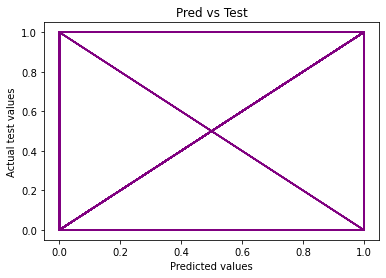

In [47]:
plt.plot(y_pred,y_test,color='purple')
plt.title('Pred vs Test')
plt.xlabel('Predicted values')
plt.ylabel('Actual test values')
plt.show()

## MAKING THE CONFUSION MATRIX

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm6=confusion_matrix(y_test,y_pred)
print(cm6)
accuracy_score6=accuracy_score(y_test,y_pred)
print(accuracy_score6)

[[78 19]
 [31 72]]
0.75


### <code><center>Accuracy: SVM(79%)>Kernel-SVM(78%)>Logistic_Regression(77.5%)>Decision Tree Classification(75%)>Naive Bayes(73%)>K-NN(66%)</center></code>

# 7) TRAINING OUR SEVENTH CLASSIFICATION MODEL --> RANDOM FOREST CLASSIFICATION

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier7=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier7.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## PREDICTING THE RESULTS ON TEST SET

In [50]:
y_pred=classifier7.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]

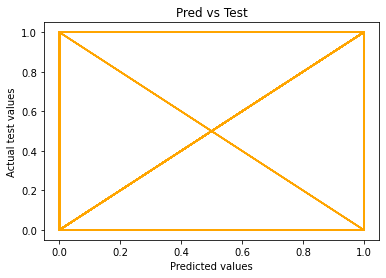

In [51]:
plt.plot(y_pred,y_test,color='orange')
plt.title('Pred vs Test')
plt.xlabel('Predicted values')
plt.ylabel('Actual test values')
plt.show()

## MAKING THE CONFUSION MATRIX

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm7=confusion_matrix(y_test,y_pred)
print(cm7)
accuracy_score7=accuracy_score(y_test,y_pred)
print(accuracy_score7)

[[87 10]
 [45 58]]
0.725


### <code><center>Accuracy: SVM(79%)>Kernel-SVM(78%)>Logistic_Regression(77.5%)>Decision Tree Classification(75%)>Naive Bayes(73%)>Random Forest Regression(72.5)>K-NN(66%)</center></code>

# VISUILISING THE DIFFERENT ACCURACIES 

In [67]:
accuracy_model_list=[accuracy_score1,accuracy_score2,accuracy_score3,accuracy_score4,accuracy_score5,accuracy_score6,accuracy_score7]

In [68]:
accuracy_model_list

[0.775, 0.79, 0.66, 0.73, 0.78, 0.75, 0.725]

In [69]:
model_name=['Logistic Regression','Support Vector Machine(SVM)','K-Nearest Neighbors(K-NN)','Naive Bayes','Kernel SVM','Decision Tree Classification','Random Forest Classification']
zipp=list(zip(model_name,accuracy_model_list))
print(zipp)

[('Logistic Regression', 0.775), ('Support Vector Machine(SVM)', 0.79), ('K-Nearest Neighbors(K-NN)', 0.66), ('Naive Bayes', 0.73), ('Kernel SVM', 0.78), ('Decision Tree Classification', 0.75), ('Random Forest Classification', 0.725)]


In [70]:
dataFrame_comparison=pd.DataFrame(zipp,columns=['Classification Model','Accuracy'])

In [71]:
dataFrame_comparison

,Classification Model,Accuracy
0,Logistic Regression,0.775
1,Support Vector Machine(SVM),0.790
2,K-Nearest Neighbors(K-NN),0.660
3,Naive Bayes,0.730
4,Kernel SVM,0.780
5,Decision Tree Classification,0.750
6,Random Forest Classification,0.725


In [72]:
# SORTED IN DESCENDING ORDER BY THE VALUE OF ACCURACY_SCORE
dataFrame_comparison.nlargest(n=10,columns=['Accuracy'])

,Classification Model,Accuracy
1,Support Vector Machine(SVM),0.790
4,Kernel SVM,0.780
0,Logistic Regression,0.775
5,Decision Tree Classification,0.750
3,Naive Bayes,0.730
6,Random Forest Classification,0.725
2,K-Nearest Neighbors(K-NN),0.660


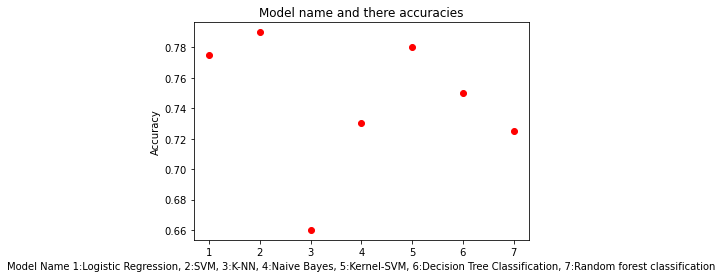

In [74]:
list1=[x for x in range(1,8)]
plt.scatter(list1,accuracy_model_list,color='red')
plt.title('Model name and there accuracies')
plt.xlabel('Model Name 1:Logistic Regression, 2:SVM, 3:K-NN, 4:Naive Bayes, 5:Kernel-SVM, 6:Decision Tree Classification, 7:Random forest classification')
plt.ylabel('Accuracy')
plt.show()

# CONCLUSION
From the above predictions we can see that the <code>accuracy_score</code> of <code>Support Vector Machine(SVM)</code> is highest i.e. <code>0.790</code> , therefore here in this case the <code>SVM</code> model fits best